# Comparison of different Classification Algorithms



In [116]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

In [117]:
importer = DatasetImporter('data/testset_orig.csv')
X = importer.data
y = importer.target
X = normalize_data(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)

X[:5]

,forks_count,is_link_in_description,doc_terms_in_readme,png_count,avg_folder_depth,md_count,html_count,doc_in_description_or_title,hw_terminology_file_or_dir_names,hw_in_description_or_title,...,intro_or_course_in_description_or_title,pdf_count,up_to_dateness,watcher_count,source_code_file_ratio,website_in_description_or_title,open_issue_count,file_count,edu_mail_ratio,hw_terminology_commits
0,0.096452,0.0,0.000000,0.011855,0.388541,0.000000,0.047444,0.0,0.435551,1.0,...,0.0,0.000000,0.622326,0.177367,0.598835,0.0,0.000000,0.377420,0.000000,0.254131
1,0.801386,0.0,0.000000,0.003085,1.000000,0.000000,0.029026,0.0,0.362631,0.0,...,0.0,0.000000,0.000000,0.837023,0.814365,0.0,0.693107,0.681855,0.007634,0.437946
2,0.813387,0.0,0.292719,0.120262,0.487672,0.556837,0.067843,0.0,0.000000,0.0,...,0.0,0.000000,0.000130,1.000000,0.565669,0.0,0.715119,0.559864,0.006829,0.508262
3,0.517498,0.0,0.446451,0.000000,0.698789,0.313670,0.000000,0.0,0.114397,0.0,...,0.0,0.000000,0.000839,0.709277,0.517458,0.0,0.557191,0.660543,0.016129,0.169421
4,0.649843,0.0,0.418096,0.019630,0.700212,0.000000,0.001426,0.0,0.000000,0.0,...,0.0,0.000781,0.000026,0.724322,0.467970,0.0,0.748994,0.628248,0.065217,0.487498


In [123]:
# add_df = pd.DataFrame({
#     'repo': np.array(importer.repos),
#     'y': y
# })
# enriched_data = pd.concat((add_df, importer.data), axis=1)
# enriched_data.to_csv('./enriched_data.csv')

## Helper

In [87]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [88]:
def analyze_results(model):
    precision = sklearn.metrics.precision_score(y_test, model.predict(X_test), average='macro')
    recall = sklearn.metrics.recall_score(y_test, model.predict(X_test), average='macro')
    accuracy = model.score(X_test, y_test)
    f_score = 2 * ((precision * recall) / (precision + recall))
    print('''
    acc test:  {:0.4f}
    precision: {:0.4f}
    recall:    {:0.4f}
    f-score:   {:0.4f}
    '''.format(accuracy, precision, recall, f_score))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), np.unique(y_test))

In [89]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [90]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.1963470319634703
acc test: 0.18518518518518517


## Logistic Regression


    acc test:  0.6667
    precision: 0.6961
    recall:    0.6603
    f-score:   0.6778
    
Confusion matrix, without normalization
[[11  1  0  0  0  0  0]
 [ 1 13  0  0  1  2  1]
 [ 0  2  7  0  0  2  1]
 [ 0  0  0  6  4  2  0]
 [ 0  3  1  0  7  3  0]
 [ 1  2  0  1  1 15  0]
 [ 0  3  3  0  1  0 13]]


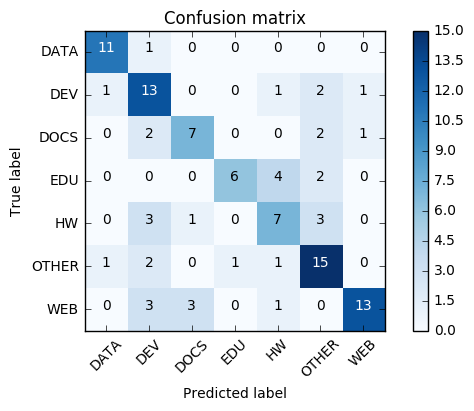

In [115]:
logreg = sklearn.linear_model.LogisticRegression(C=100, max_iter=100, n_jobs=2)
logreg.fit(X_train, y_train)
analyze_results(logreg)

We would like to identfy whether the metrics are good predictors for the classes.



In [92]:
print('\n'.join(['{: 2d}: {:s}'.format(i, e) for i,e in enumerate(X_train.columns)]))

 0: forks_count
 1: is_link_in_description
 2: doc_terms_in_readme
 3: png_count
 4: avg_folder_depth
 5: md_count
 6: html_count
 7: doc_in_description_or_title
 8: hw_terminology_file_or_dir_names
 9: hw_in_description_or_title
 10: file_folder_ratio
 11: is_io_page
 12: avg_entropy
 13: repo_size
 14: intro_or_course_in_description_or_title
 15: pdf_count
 16: up_to_dateness
 17: watcher_count
 18: source_code_file_ratio
 19: website_in_description_or_title
 20: open_issue_count
 21: file_count
 22: edu_mail_ratio
 23: hw_terminology_commits


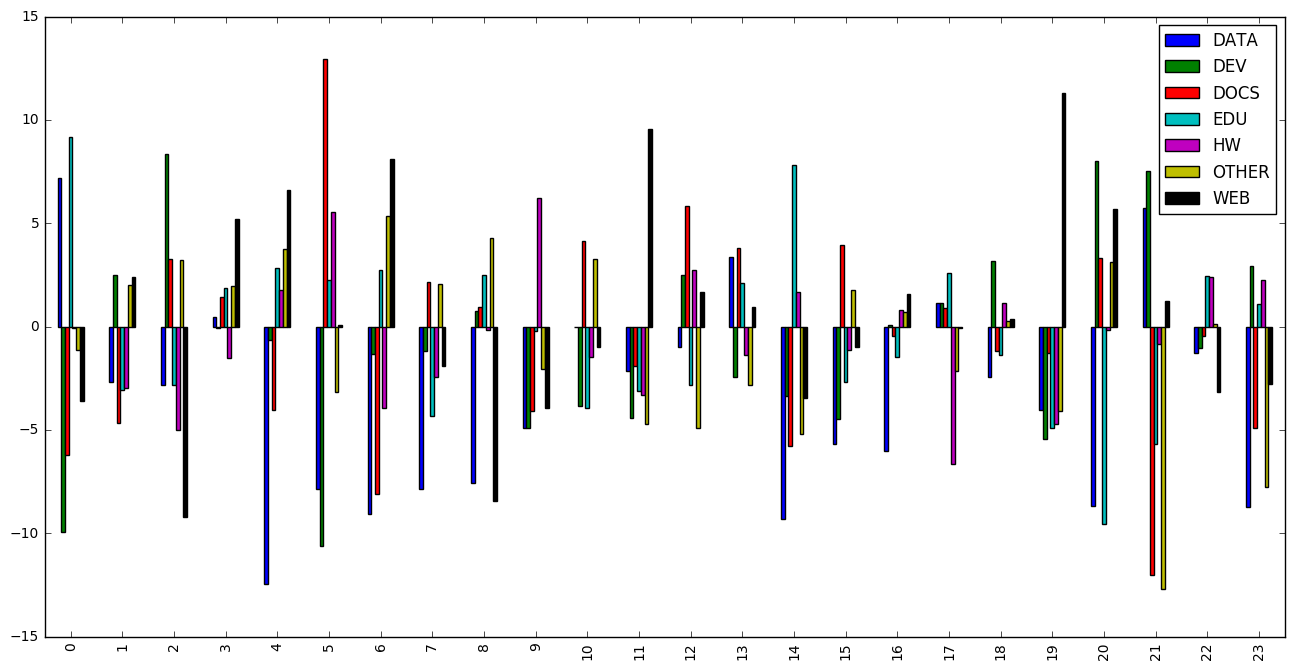

In [93]:
coefs = pd.DataFrame(logreg.coef_.transpose(), columns=logreg.classes_)
coefs.plot(kind='bar', figsize=(16, 8))

## SVM


    acc test:  0.6389
    precision: 0.6880
    recall:    0.6238
    f-score:   0.6543
    
Confusion matrix, without normalization
[[10  2  0  0  0  0  0]
 [ 0 12  3  0  1  2  0]
 [ 0  2  6  0  0  3  1]
 [ 0  1  0  5  3  3  0]
 [ 0  0  2  0  7  5  0]
 [ 2  0  0  0  1 17  0]
 [ 2  3  3  0  0  0 12]]


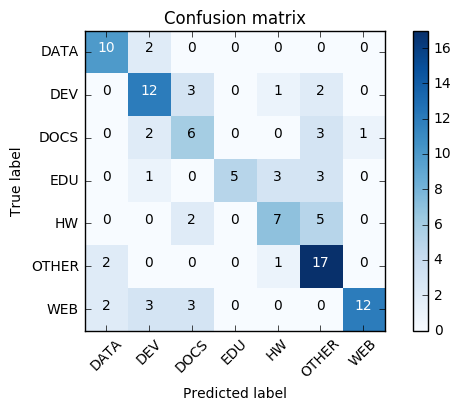

In [114]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(X_train, y_train)
analyze_results(svm)

## Random Forest


    acc test:  0.6389
    precision: 0.6615
    recall:    0.6173
    f-score:   0.6387
    
Confusion matrix, without normalization
[[ 8  2  2  0  0  0  0]
 [ 1 12  1  0  1  1  2]
 [ 3  1  4  0  0  1  3]
 [ 1  0  1  7  3  0  0]
 [ 0  4  0  0  8  1  1]
 [ 0  3  2  0  0 14  1]
 [ 0  1  3  0  0  0 16]]


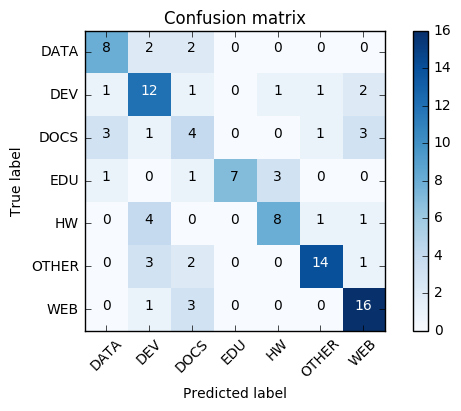

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(X_train, y_train)
analyze_results(rf)

## NN


    acc test:  0.6852
    precision: 0.7076
    recall:    0.6747
    f-score:   0.6908
    
Confusion matrix, without normalization
[[12  0  0  0  0  0  0]
 [ 2 11  2  0  0  2  1]
 [ 1  1  7  0  0  2  1]
 [ 0  0  1  6  3  2  0]
 [ 1  4  1  0  6  2  0]
 [ 1  0  0  0  1 18  0]
 [ 2  0  4  0  0  0 14]]


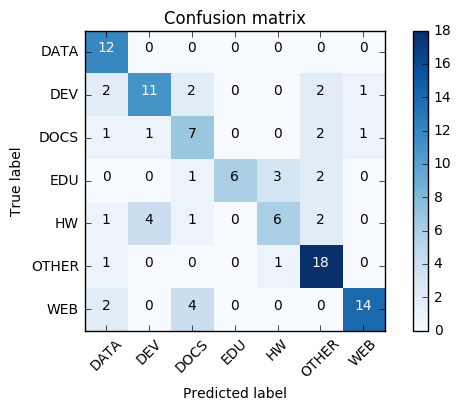

In [112]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(X_train, y_train)
analyze_results(mlp)

## Voting Classifier

Combining the best classifier improves the accuracy and precision a bit


    acc test:  0.6944
    precision: 0.7179
    recall:    0.6817
    f-score:   0.6993
    
Confusion matrix, without normalization
[[11  1  0  0  0  0  0]
 [ 1 13  1  0  0  2  1]
 [ 1  1  7  0  0  2  1]
 [ 0  0  0  6  4  2  0]
 [ 1  3  1  0  7  2  0]
 [ 2  1  0  0  0 17  0]
 [ 2  0  4  0  0  0 14]]


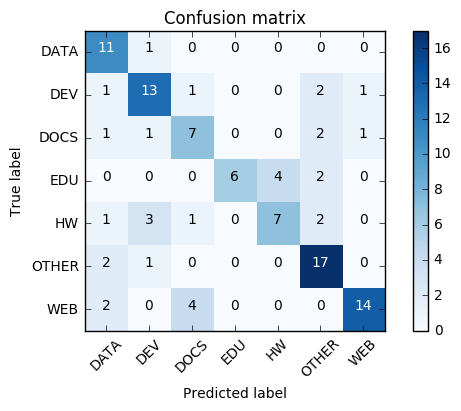

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

std_logreg = Pipeline([
    ('std', StandardScaler()),
    ('log_reg', LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', multi_class='ovr', random_state=1337))
])
vc = VotingClassifier([('log', std_logreg),
                       ('svc', SVC(C=20.0, random_state=1337)),
                      ('rf', RandomForestClassifier(n_estimators=100, random_state=1337)),
                      ('mlp', MLPClassifier(max_iter=20000, hidden_layer_sizes=(50, 20), random_state=1337, shuffle=False,
                                    learning_rate='adaptive')),
                      ('mlp2', MLPClassifier(max_iter=20000, hidden_layer_sizes=(100,), random_state=1337, shuffle=False, learning_rate='adaptive')),
                      ('gb', GradientBoostingClassifier(learning_rate=0.15, random_state=1337)),
                      ], n_jobs=1)
vc.fit(X_train, y_train)

analyze_results(vc)

## Misclassified Repos

In [109]:
y_pred = vc.predict(X)
false_classification = np.logical_and(y_pred != y, y != '')

pd.DataFrame({
    'repo': np.array(importer.repos)[false_classification],
    'true': y[false_classification],
    'predicted': y_pred[false_classification]
})

,predicted,repo,true
0,HW,https://github.com/briantemple/homeworkr,DEV
1,DEV,https://github.com/m2mtech/calculator-2015,HW
2,DOCS,https://github.com/bcaffo/751and2,HW
3,DATA,https://github.com/alex/what-happens-when,EDU
4,DATA,https://github.com/github/maturity-model,DOCS
5,DATA,https://github.com/BloombergMedia/whatiscode,WEB
6,DATA,https://github.com/BloombergMedia/whatiscode,WEB
7,DOCS,https://github.com/nasa/api-docs,WEB
8,DOCS,https://github.com/jimeh/jimeh.me-api,WEB
9,DOCS,https://github.com/corefan/playfuljs,WEB


## How the dataset size affects results

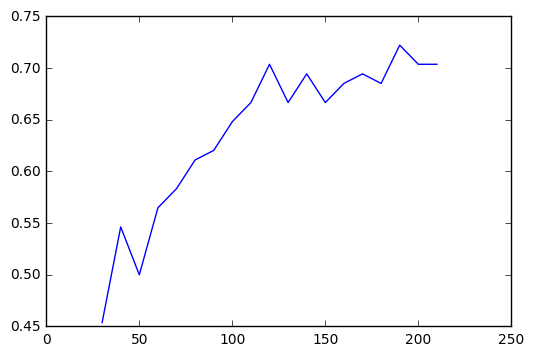

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C=20.0, random_state=None)
svm = vc
accuracies = []
datasizes = []
for datasize in range(30, len(X_train), 10):
    datasizes.append(datasize)
    svm.fit(X_train[:datasize], y_train[:datasize])
    accuracies.append(svm.score(X_test, y_test))

plt.plot(datasizes, accuracies)

# Other classifier that we tried

They did not yield the best results, but for completeness

## Two Step Classifier

A random sample of github repositories contains a majority of DEV repositories. Thus we tried predicting DEV first and then have a second classifier for the balanced rest of the classes.

Turned out, it does not keep up with single step approaches.

In [103]:
from customClassifier.TwoStepClassifier import TwoStepClassifier
tsc = TwoStepClassifier(
    sklearn.neural_network.MLPClassifier(max_iter=20000, hidden_layer_sizes=(50,20), random_state=1337, shuffle=False, learning_rate='adaptive'),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(X_train, y_train)


    acc test:  0.6389
    precision: 0.6202
    recall:    0.6152
    f-score:   0.6177
    
Confusion matrix, without normalization
[[ 9  0  3  0  0  0  0]
 [ 3 11  1  0  0  2  1]
 [ 2  1  5  0  1  1  2]
 [ 2  0  0  6  4  0  0]
 [ 1  2  1  0  6  4  0]
 [ 0  1  1  0  1 16  1]
 [ 0  0  1  3  0  0 16]]


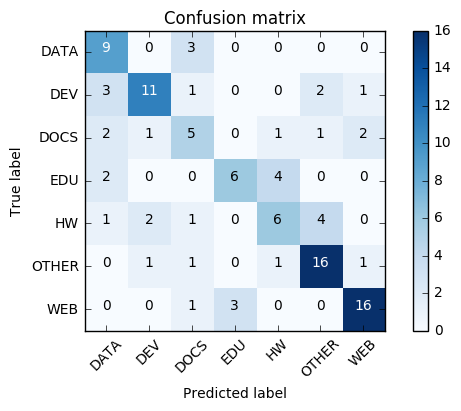

In [104]:
analyze_results(tsc)

# Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.15, random_state=1337)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False)


    acc test:  0.6389
    precision: 0.6498
    recall:    0.6094
    f-score:   0.6289
    
Confusion matrix, without normalization
[[ 9  2  0  1  0  0  0]
 [ 1 14  1  0  0  2  0]
 [ 3  1  3  0  1  3  1]
 [ 2  1  2  5  2  0  0]
 [ 2  2  0  0  8  2  0]
 [ 1  2  1  0  0 16  0]
 [ 0  1  5  0  0  0 14]]


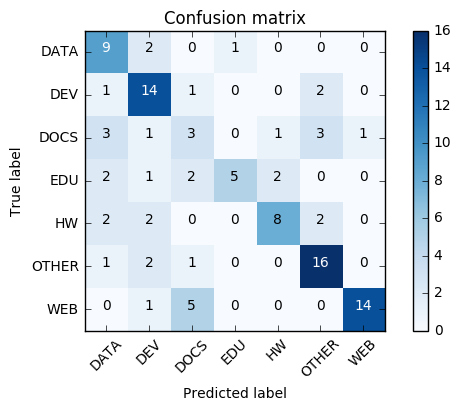

In [106]:
analyze_results(gbc)

## DecisionTree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')


    acc test:  0.5741
    precision: 0.5948
    recall:    0.5585
    f-score:   0.5761
    
Confusion matrix, without normalization
[[ 7  2  2  1  0  0  0]
 [ 0  9  1  0  2  4  2]
 [ 2  2  4  1  3  0  0]
 [ 1  2  0  6  3  0  0]
 [ 0  1  2  0  9  1  1]
 [ 1  3  1  0  0 14  1]
 [ 0  7  0  0  0  0 13]]


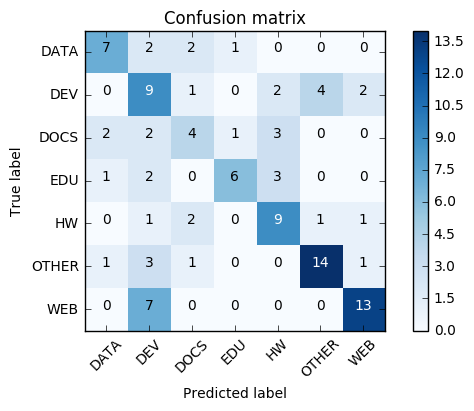

In [98]:
analyze_results(dtc)